In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

Dataset was gathered using the code from the second task,and saved in this directory.

In [2]:
dataset = pd.read_pickle('dataset_academy.pickle')

In [3]:
logging.info(f"Dataset length :{len(dataset)}")
logging.info(f"Dataset columns :{dataset.columns}")

In [4]:
dataset.reset_index(drop=True, inplace=True)
dataset.head()

,user_id,avg_open_team,avg_open_event,avg_open_league,avg_open_player,avg_open_matches,avg_open_lineups,avg_open_sport,avg_open_overs,avg_open_fight_night,...,avg_follow_player,avg_follow_league,avg_chat_activity,avg_chat_action,avg_ads_impression_custom,avg_odds_impression,avg_total_screen_time,avg_num_distinct_events,geo_country,campaign
0,2e26d3769e9311c8dba02ba7376f9c03,0.064516,0.483871,0.064516,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.741935,0.451613,41859.258065,2.129032,Brazil,And_GA_BR_valuable_cpc
1,c2bf754aa582c17b29f0d7e57aaadcce,0.000000,0.838710,0.064516,0.129032,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.129032,120081.419355,1.064516,Gambia,<organic>
2,4301ff35fa086ec4bd8749f73d40b6d0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,182.870968,0.129032,Brazil,And_MO_WW_Install
3,9cdf7f4b1cc627bec3d8c300cff9aeb2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.064516,0.000000,2561.516129,0.258065,Cameroon,And_GA_T3_valuable_cpc_#2
4,19b54af703e02258094b15067058e64c,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.096774,0.000000,63684.709677,2.580645,Haiti,<organic>


In [5]:
dataset['campaign'].value_counts()

campaign
<organic>                                                                55008
And_GA_BR_valuable_cpc                                                   10518
And_GA_T3_valuable_cpc_#2                                                 8546
And_GA_WW_Install_valuable_cpc                                            4703
And_GA_T1_valuable_cpc_#2                                                 3760
                                                                         ...  
exclusively_in_app                                                           1
06/23 - BR - Rule the Cage - Search ads (keywords) - Traffic - PT(BR)        1
BTL                                                                          1
And_GA_ZA_valuable_cpc                                                       1
And_GA_NG_Install                                                            1
Name: count, Length: 153, dtype: int64

In [6]:
for columns in dataset.columns:
   logging.info(f"Number if missing values in {columns} : {dataset[columns].isnull().sum()}")

In [7]:
logging.info(f"Different countries in the dataset : {dataset['geo_country'].nunique()}")

In [8]:
logging.info(f"Different campaigns represented in the dataset : {dataset['campaign'].nunique()}")

In [9]:
# define classes: class 1 are organic users and class 2 are campaign users
dataset['user_class'] = np.where(dataset['campaign'] == '<organic>', 0, 1)


In [10]:
for column in dataset.columns:
   if dataset[column].dtype == 'float64':
      if np.mean(dataset[column], axis=0) <= 0.1:
       logging.info(f"Column {column} ")

Initial thoughts on the model:

- try linear and non linear supervised  model, compare them; then, choose one model for parameter tuning and tune it, then use that model for feature selection desribed below.
- use supervised  model on data, all organic data with high probability of being non organic will be added to the training set and if evaluation on independant samples (validation dataset) is better, keep them changed
- use probabilistic method; starting with certainty of 1 for non organic users to be non organic and soft label of 0.5/0.7 for organic users to be organic, build classifier and update probabilities of organic users, if they drop belove certain tresold, they are added to the non organic users
- use ensamble methods, train multiple models on non organic data and use them to classify organic data, if they mostly agree on the classification, add the user to the non organic users

After obtaining new labels, I will use supervised model for classification.

Comments
- I will probably not add synthetic data, as I lack domain knowledge to be certain in my data ingestion.

In [11]:
dataset.drop(columns=['user_id', 'campaign'], inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()
dataset['geo_country'] = label_encoder.fit_transform(dataset['geo_country'])

In [14]:
dataset.head()

,avg_open_team,avg_open_event,avg_open_league,avg_open_player,avg_open_matches,avg_open_lineups,avg_open_sport,avg_open_overs,avg_open_fight_night,avg_open_stage,...,avg_follow_player,avg_follow_league,avg_chat_activity,avg_chat_action,avg_ads_impression_custom,avg_odds_impression,avg_total_screen_time,avg_num_distinct_events,geo_country,user_class
0,0.064516,0.483871,0.064516,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.741935,0.451613,41859.258065,2.129032,24,1
1,0.000000,0.838710,0.064516,0.129032,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,1.129032,120081.419355,1.064516,63,0
2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,182.870968,0.129032,24,1
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.064516,0.000000,2561.516129,0.258065,29,1
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.096774,0.000000,63684.709677,2.580645,75,0


In [15]:
organic_users,non_organic_users = dataset[dataset['user_class'] == '1'],dataset[dataset['user_class'] == '2']
organic_users.reset_index(drop=True, inplace=True)
non_organic_users.reset_index(drop=True, inplace=True)

In [16]:
logging.info(f"Number of organic users : {len(organic_users)}")
logging.info(f"Number of non-organic users : {len(non_organic_users)}")

Modeling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

In [18]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [19]:
X = dataset.drop(columns=['user_class'])
y = dataset['user_class']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Random Forests

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
randomForest = RandomForestClassifier(n_estimators=100,
                                      criterion='gini',
                                      max_depth=None,
                                      min_impurity_decrease=0.0,
                                      random_state=42
                                      )

In [23]:
randomForest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [24]:
predictions = randomForest.predict_proba(X_test)

In [25]:
threshold = 0.5

In [28]:
y_pred = np.where(predictions[:,1]<threshold,0,1)

In [29]:
randomForestAccuracy = accuracy_score(y_true = y_test.astype(int) ,
                                      y_pred = y_pred
                                      )
randomForestPrecision = precision_score(y_true = y_test.astype(int) ,
                                        y_pred = y_pred
                                      )
randomForestRecall = recall_score(y_true = y_test.astype(int) ,
                                  y_pred = y_pred
                                  )
randomForestRoc_auc_score = roc_auc_score(y_true = y_test.astype(int),
                                          y_score = y_pred
                                  )

In [30]:
print(f"Accuracy : {randomForestAccuracy}, precision : {randomForestPrecision}, Recall : {randomForestRecall}, ROC AUC Score {randomForestRoc_auc_score}")

Accuracy : 0.72613699062032, precision : 0.7127726570103624, Recall : 0.8656654151022111, ROC AUC Score 0.7046212810591114


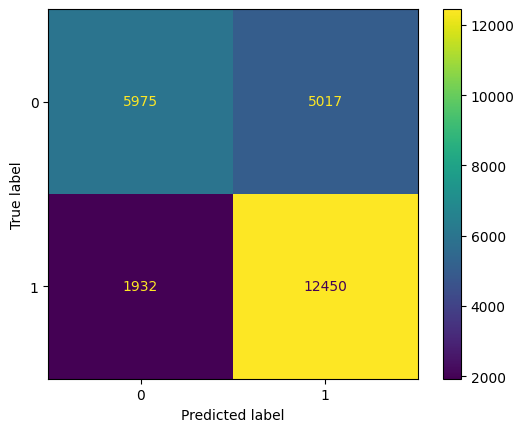

In [31]:
cm = confusion_matrix(y_test.astype(int), y_pred)
ConfusionMatrixDisplay(cm).plot()

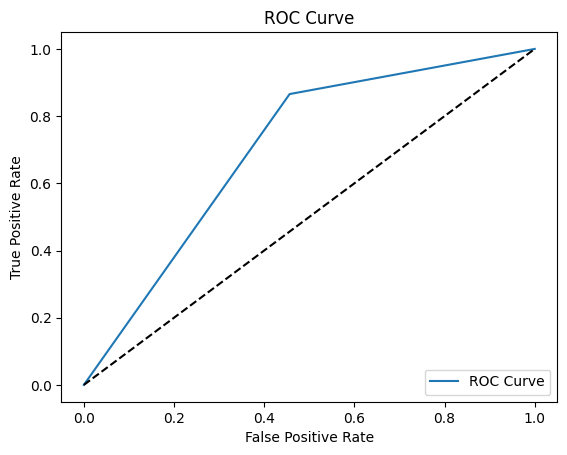

In [33]:
fpr, tpr, thresholds = roc_curve(y_true=y_test.astype(int),y_score=y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install xgboost

In [34]:
from xgboost import XGBClassifier

Max depth
○ Minimum child weight
○ Subsample
○ Learning rate (eta)
○ Number of boosting rounds

In [35]:
xgboost_model = XGBClassifier(
    n_estimators=None,
    max_depth=None,
    grow_policy= None, #'depthwise',
    learning_rate=None
)

In [39]:
xgboost_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
predictions = xgboost_model.predict_proba(X_test)

In [41]:
threshold = 0.5
y_pred = np.where(predictions[:,0]>threshold,0,1)

In [42]:
xgboostAccuracy = accuracy_score(y_true = y_test.astype(int) ,
                                      y_pred = y_pred
                                      )
xgboostPrecision = precision_score(y_true = y_test.astype(int) ,
                                        y_pred = y_pred
                                      )
xgboostRecall = recall_score(y_true = y_test.astype(int) ,
                                  y_pred = y_pred
                                  )
xgboostRoc_auc_score = roc_auc_score(y_true = y_test.astype(int),
                                          y_score = y_pred
                                  )

In [43]:
print(f"Accuracy : {xgboostAccuracy}, precision : {xgboostPrecision}, Recall : {xgboostRecall}, ROC AUC Score {xgboostRoc_auc_score}")

Accuracy : 0.766808544179081, precision : 0.7371015629376505, Recall : 0.9148936170212766, ROC AUC Score 0.7439733732850197


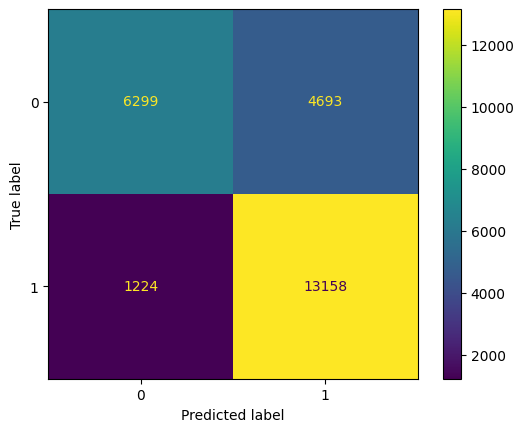

In [45]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

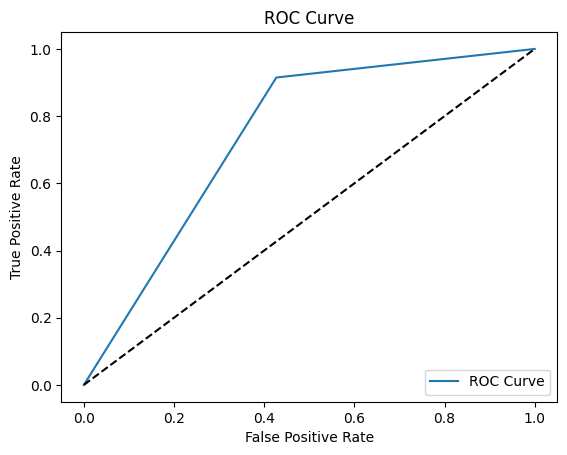

In [47]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Linear model -> Linear SVM

In [48]:
from sklearn.svm import LinearSVC as SVM

In [49]:
SVM_model = SVM(penalty='l2',
                loss='hinge',
                class_weight=None,
                random_state=42
                )

In [50]:
SVM_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(loss='hinge', random_state=42)

In [51]:
predictions = SVM_model.predict(X_test)
y_pred = predictions

In [52]:
SVMAccuracy = accuracy_score(y_true = y_test,
                                      y_pred = y_pred
                                      )
SVMPrecision = precision_score(y_true = y_test,
                                        y_pred = y_pred
                                      )
SVMRecall = recall_score(y_true = y_test,
                                  y_pred = y_pred
                                  )
SVMRoc_auc_score = roc_auc_score(y_true = y_test,
                                          y_score = y_pred
                                  )

In [53]:
print(f"Accuracy : {SVMAccuracy}, precision : {SVMPrecision}, Recall : {SVMRecall}, ROC AUC Score {SVMRoc_auc_score}")

Accuracy : 0.43300228580436667, precision : 0.0, Recall : 0.0, ROC AUC Score 0.4997725618631732


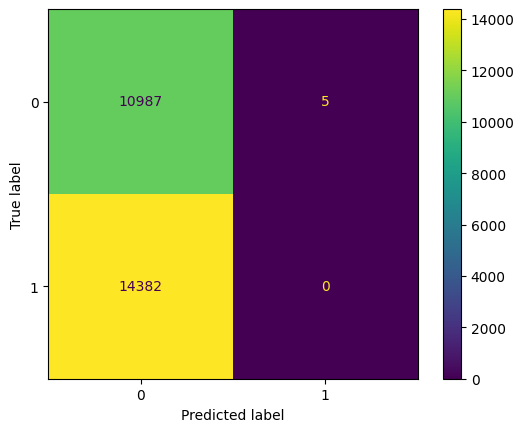

In [54]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

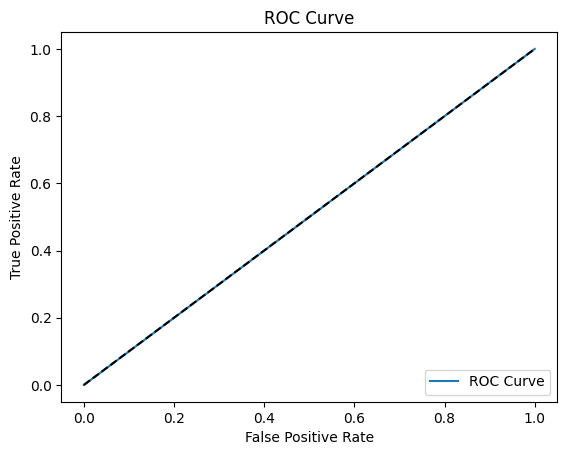

In [55]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression as LR

In [57]:
LR_model = LR(max_iter=1000,
              class_weight=None,
              random_state=42)

In [58]:
LR_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [59]:
predictions = LR_model.predict_proba(X_test)

In [60]:
threshold=0.5

In [61]:
y_pred = np.where(predictions[:,0]>threshold,0,1)

In [63]:
LRAccuracy = accuracy_score(y_true = y_test,
                                      y_pred = y_pred
                                      )
LRPrecision = precision_score(y_true = y_test,
                                        y_pred = y_pred
                                      )
LRRecall = recall_score(y_true = y_test,
                                  y_pred = y_pred
                                  )
LRRoc_auc_score = roc_auc_score(y_true = y_test,
                                          y_score = y_pred
                                  )

In [64]:
print(f"Accuracy : {LRAccuracy}, precision : {LRPrecision}, Recall : {LRRecall}, ROC AUC Score {LRRoc_auc_score}")

Accuracy : 0.566800662095058, precision : 0.566800662095058, Recall : 1.0, ROC AUC Score 0.5


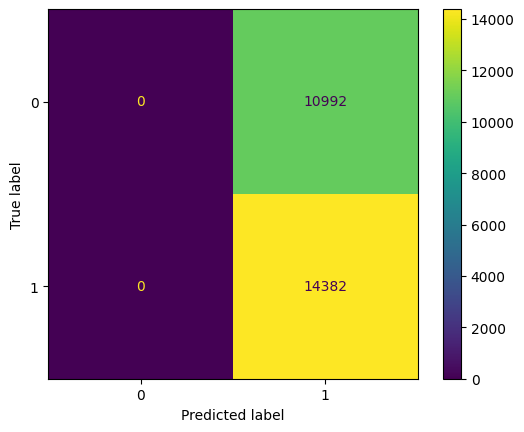

In [65]:
cm = confusion_matrix(y_test.astype(int), y_pred)
ConfusionMatrixDisplay(cm).plot()

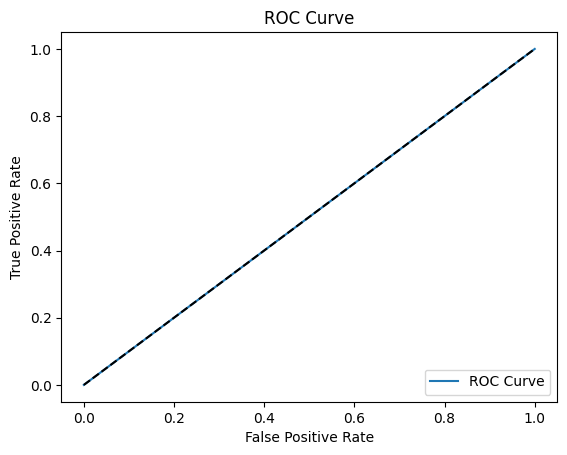

In [66]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Conslusions?
- proceeding with XGBoost, I will try to tune parameters as much as possible, while trying to up the precision metrics
- next, I will try to drop some features or scale them and see the results
- finally, knowing the underlying uncertaily in the data labeling, I will try to update the labels by using the best predicting model up to that point and I will update the classes (for the <organic> data entries) : for predictions the model is highly confident in, the labels will be changed. Starting class probabilities will be obtained by predicting with the best model on the data.

Grid search for optimal XGBoost parameters

In [67]:
from sklearn.model_selection import GridSearchCV

In [ ]:
xgboost_model = XGBClassifier(seed=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': range(3,10,2),
    'subsample': [0.5,0.7,0.9],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': range(1,6,2)
}

- Goal metric - precision
- Why? - lower FP rate, less wrong decisions, can use model for  relabeling of the <organic> data users.

In [314]:
grid_serach_xgboost = GridSearchCV(estimator = xgboost_model,
                                   param_grid = param_grid,
                                   verbose=10,
                                   scoring='precision',
                                   cv=3
                                   )

In [315]:
grid_serach_xgboost.fit(X_train, y_train.astype(int)-1)

print("Best parameters for precision:", grid_serach_xgboost.best_params_)
print("Best precision score:", grid_serach_xgboost.best_score_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3; 1/324] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5
[CV 1/3; 1/324] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.616 total time=   5.2s
[CV 2/3; 1/324] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5
[CV 2/3; 1/324] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.615 total time=   5.5s
[CV 3/3; 1/324] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5
[CV 3/3; 1/324] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5;, score=0.616 total time=   0.7s
[CV 1/3; 2/324] START learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7
[CV 1/3; 2/324] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subs

Best parameters for precision:

- {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.7}
- best precision score: 0.7413683715935915

Accuracy : 0.7600693623394026, Precision : 0.7419204293548011, Recall : 0.8842998192184676, ROC AUC Score 0.7409126461448962


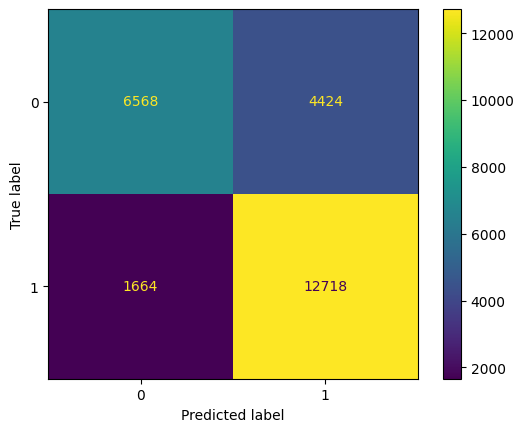

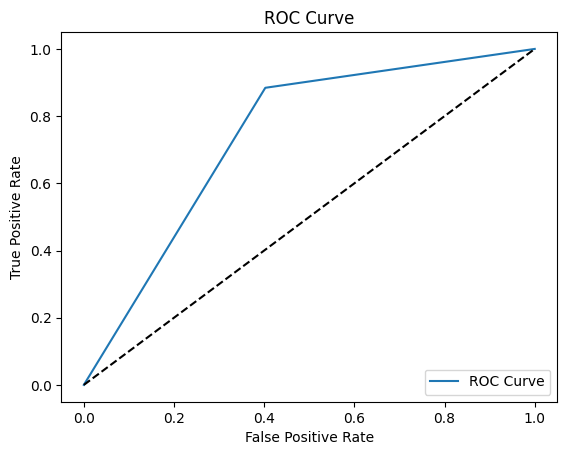

In [69]:
xgboost_model = XGBClassifier(
    n_estimators=500,
    max_depth=7,
    subsample=0.7,
    grow_policy= 'depthwise',
    learning_rate=0.2,
    min_child_weight=5,
    random_state=42
)

xgboost_model.fit(X_train,y_train)

predictions = xgboost_model.predict_proba(X_test)

threshold = 0.5

y_pred = np.where(predictions[:,0]>threshold,0,1)

xgboostAccuracy = accuracy_score(y_true = y_test,
                                      y_pred = y_pred
                                      )

xgboostPrecision = precision_score(y_true = y_test,
                                        y_pred = y_pred
                                      )

xgboostRecall = recall_score(y_true = y_test,
                                  y_pred = y_pred
                                  )

xgboostRoc_auc_score = roc_auc_score(y_true = y_test,
                                          y_score = y_pred
                                  )

print(f"Accuracy : {xgboostAccuracy}, Precision : {xgboostPrecision}, Recall : {xgboostRecall}, ROC AUC Score {xgboostRoc_auc_score}")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Feature engineering

Visualizing feature importances for XGBoost

In [70]:
importances = xgboost_model.feature_importances_
indices = np.argsort(importances)[::-1]

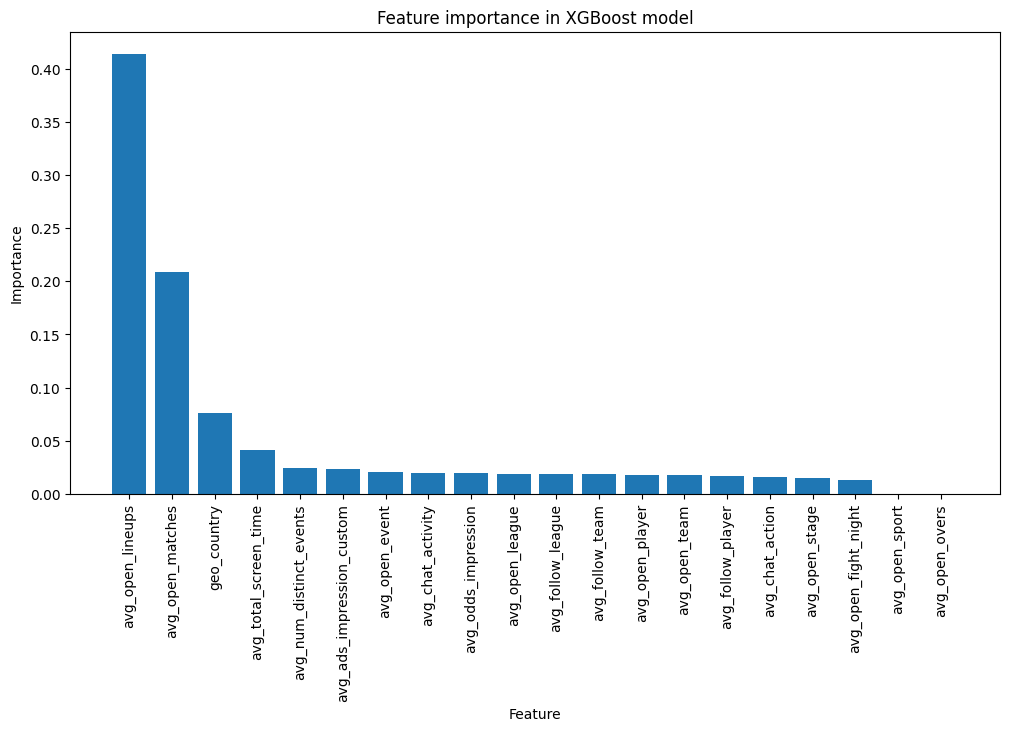

In [71]:
plt.figure(figsize=(12,6))
plt.title('Feature importance in XGBoost model')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [72]:
importances[indices]

array([0.41439155, 0.20883073, 0.07642801, 0.04126601, 0.02456085,
       0.02292615, 0.02022223, 0.01996789, 0.01942427, 0.01869807,
       0.01842547, 0.01817533, 0.01780745, 0.01772651, 0.01656201,
       0.01600328, 0.01527586, 0.01330836, 0.        , 0.        ],
      dtype=float32)

In [73]:
dataset.drop(columns=['avg_open_overs','avg_open_sport'],inplace=True)

Creating separate test dataset for feedback loop.

In [127]:
X = dataset.drop(columns=['user_class'])
y = dataset['user_class']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.22, random_state=42)


In [128]:
xgboost_model = XGBClassifier(
    n_estimators=500,
    max_depth=7,
    subsample=0.7,
    grow_policy= 'depthwise',
    learning_rate=0.2,
    min_child_weight=5,
    random_state=42
)

xgboost_model.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Validation set metrics : 

Accuracy : 0.7613550415986625, Precision : 0.7461968148324222, Recall : 0.8792801624536097, ROC AUC Score 0.7426382362083547


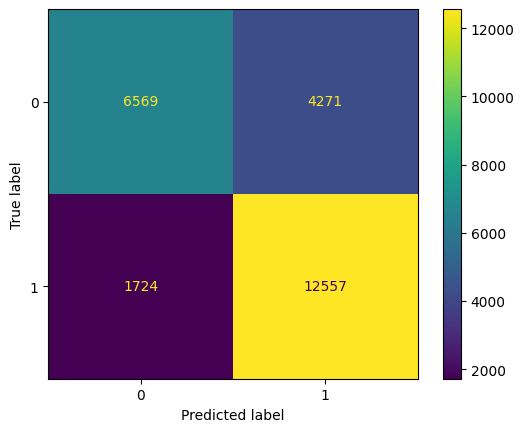

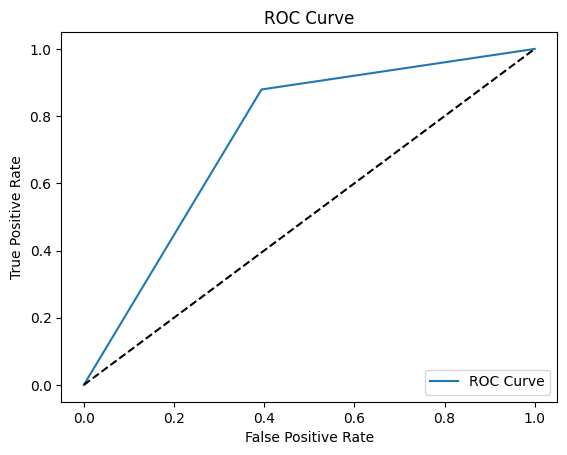

In [129]:
test_predictions = xgboost_model.predict_proba(X_val)

threshold = 0.5

y_pred = np.where(test_predictions[:,0]>threshold,0,1)

xgboostAccuracy = accuracy_score(y_true = y_val,
                                      y_pred = y_pred
                                      )

xgboostPrecision = precision_score(y_true = y_val,
                                        y_pred = y_pred
                                      )

xgboostRecall = recall_score(y_true = y_val,
                                  y_pred = y_pred
                                  )

xgboostRoc_auc_score = roc_auc_score(y_true = y_val,
                                          y_score = y_pred
                                  )
print("Validation set metrics : \n")
print(f"Accuracy : {xgboostAccuracy}, Precision : {xgboostPrecision}, Recall : {xgboostRecall}, ROC AUC Score {xgboostRoc_auc_score}")

cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(cm).plot()

fpr, tpr, thresholds = roc_curve(y_true=y_val,y_score=y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Defining safety metrics, where I will use these to get

In [130]:
safety_metrics = {'accuracy' : xgboostAccuracy,
                  'precision' : xgboostPrecision,
                  'recall' : xgboostRecall,
                  'roc_auc_score':xgboostRoc_auc_score
                  }
safety_metrics

{'accuracy': 0.7613550415986625,
 'precision': 0.7461968148324222,
 'recall': 0.8792801624536097,
 'roc_auc_score': 0.7426382362083547}

Test set metrics : 

Accuracy : 0.7538425159612201, Precision : 0.7378041543026707, Recall : 0.8718092566619916, ROC AUC Score 0.7371463054949331


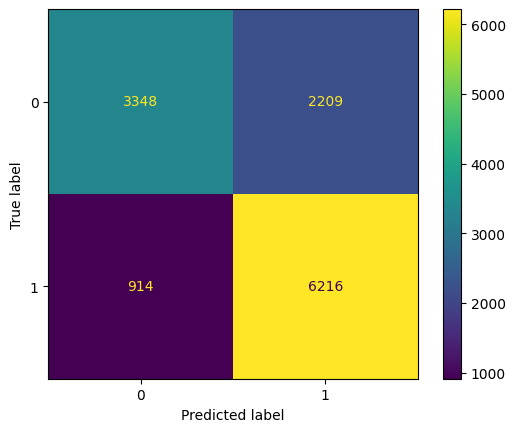

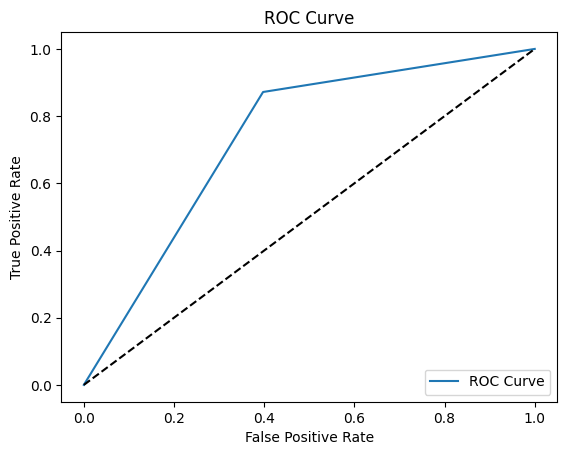

In [131]:
test_predictions = xgboost_model.predict_proba(X_test)

threshold = 0.5

y_pred = np.where(test_predictions[:,0]>threshold,0,1)

xgboostAccuracy = accuracy_score(y_true = y_test,
                                      y_pred = y_pred
                                      )

xgboostPrecision = precision_score(y_true = y_test,
                                        y_pred = y_pred
                                      )

xgboostRecall = recall_score(y_true = y_test,
                                  y_pred = y_pred
                                  )

xgboostRoc_auc_score = roc_auc_score(y_true = y_test,
                                          y_score = y_pred
                                  )
print("Test set metrics : \n")
print(f"Accuracy : {xgboostAccuracy}, Precision : {xgboostPrecision}, Recall : {xgboostRecall}, ROC AUC Score {xgboostRoc_auc_score}")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Defining test safety metrics, where I will use these to get

In [132]:
test_safety_metrics = {'accuracy' : xgboostAccuracy,
                  'precision' : xgboostPrecision,
                  'recall' : xgboostRecall,
                  'roc_auc_score':xgboostRoc_auc_score
                  }
test_safety_metrics

{'accuracy': 0.7538425159612201,
 'precision': 0.7378041543026707,
 'recall': 0.8718092566619916,
 'roc_auc_score': 0.7371463054949331}

In [133]:
safety_metrics['f1_score'] = 2 * (safety_metrics['precision'] * safety_metrics['recall']) / (safety_metrics['precision'] + safety_metrics['recall'])

In [134]:
test_safety_metrics['f1_score'] = 2 * (test_safety_metrics['precision'] * test_safety_metrics['recall']) / (test_safety_metrics['precision'] + test_safety_metrics['recall'])

Evaluation on train dataset

Train set metrics : 

Accuracy : 0.8449956210280479, Precision : 0.8128713885663548, Recall : 0.9435888287645439, ROC AUC Score 0.8298788980786278


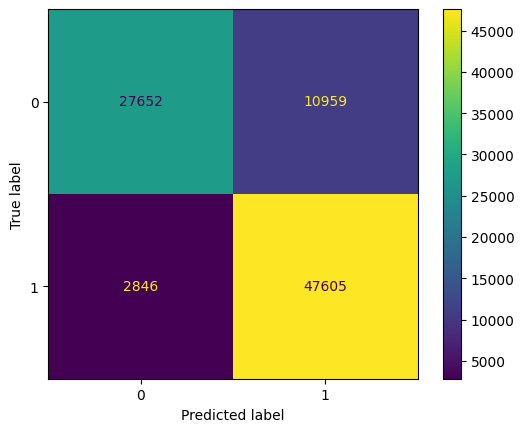

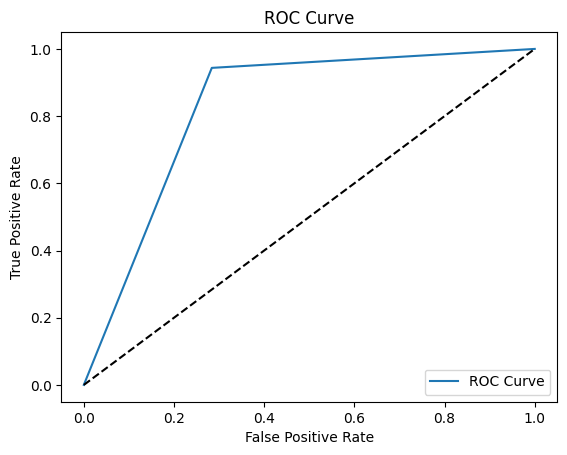

In [135]:
train_predictions = xgboost_model.predict_proba(X_train)

threshold = 0.5

y_pred = np.where(train_predictions[:,0]>threshold,0,1)

xgboostAccuracy = accuracy_score(y_true = y_train,
                                      y_pred = y_pred
                                      )

xgboostPrecision = precision_score(y_true = y_train,
                                        y_pred = y_pred
                                      )

xgboostRecall = recall_score(y_true = y_train,
                                  y_pred = y_pred
                                  )

xgboostRoc_auc_score = roc_auc_score(y_true = y_train,
                                          y_score = y_pred
                                  )

print("Train set metrics : \n")
print(f"Accuracy : {xgboostAccuracy}, Precision : {xgboostPrecision}, Recall : {xgboostRecall}, ROC AUC Score {xgboostRoc_auc_score}")

cm = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cm).plot()

fpr, tpr, thresholds = roc_curve(y_true=y_train,y_score=y_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Using higher threshold, what I am saying is this: if the model is uncertain about the class, rather predict the class 2, for which we have correct labels.
As can be seen, performance on train and valid dataset is similar.
Now. I will create feedback loop; I will use model certaintly and over n iterations use this logic: for all the samples for which the model is uncertain for, try changing labels. Evaluate such mod
el and if target metric is better, keep labels and repeat procedure n times.

In [119]:
from sklearn.metrics import f1_score

In [136]:
X_orig = X_train
y_orig = y_train

In [97]:
# X_train = X_orig
# y_train = y_orig

In [137]:
uncertain_indexes = np.where((train_predictions[:, 0] > 0.5) & (train_predictions[:, 0] < 0.55))[0]


In [138]:
print(f"Length of the changed labels : {len(uncertain_indexes)}")

Length of the changed labels : 2208


In [139]:
y_train.iloc[uncertain_indexes] = 1

In [140]:
lower_threshold, upper_threshold = 0.5,0.6

In [141]:
val_predictions = xgboost_model.predict_proba(X_val)

best_val_f1_score = safety_metrics['f1_score']
best_test_f1_score = test_safety_metrics['f1_score']

lower_threshold, upper_threshold = 0.5, 0.6
iterations = 10

for iteration in range(iterations):
    train_predictions = xgboost_model.predict_proba(X_train)
    xgboost_model.fit(X_train, y_train)

    val_predictions = xgboost_model.predict_proba(X_val)
    y_pred_val = np.where(val_predictions[:, 0] > 0.5, 0, 1)
    current_val_f1_score = f1_score(y_val, y_pred_val)

    if current_val_f1_score > best_val_f1_score:

        test_predictions = xgboost_model.predict_proba(X_test)
        y_pred_test = np.where(test_predictions[:, 0] > 0.5, 0, 1)
        current_test_f1_score = f1_score(y_test, y_pred_test)

        if current_test_f1_score > best_test_f1_score:
            print("Both validation and test F1 scores improved.")
            best_val_f1_score = current_val_f1_score
            best_test_f1_score = current_test_f1_score
            uncertain_indexes = np.where((train_predictions[:, 0] > lower_threshold) & (train_predictions[:, 0] < upper_threshold))[0]
            print(f"Length of the changed labels : {len(uncertain_indexes)}")
            y_train.iloc[uncertain_indexes] = 1
        else:
            print("Validation improved but not test.")
            print("Stopping.")
            break
    else:
        print("No improvement in validation F1 score.")
        print("Stopping.")
        break

    print(f"Iteration {iteration}: vlidation F1 Score: {current_val_f1_score}, test F1 Score: {current_test_f1_score}\n")

Both validation and test F1 scores improved.
Length of the changed labels : 4052
Iteration 0: vlidation F1 Score: 0.8124193091286962, test F1 Score: 0.8082484597007419
Both validation and test F1 scores improved.
Length of the changed labels : 3041
Iteration 1: vlidation F1 Score: 0.8146682332570652, test F1 Score: 0.8096003958926142
Both validation and test F1 scores improved.
Length of the changed labels : 2396
Iteration 2: vlidation F1 Score: 0.8166580476378791, test F1 Score: 0.8119871132453955
Validation improved but not test.
Stopping.


In 3 iterations, validation and test set had seen improvement, and changed labels should be considered.

I will plot results on the train, val and test set.

In [144]:
print(f"Newly recorded best f1 on independant test dataset: {best_test_f1_score}, previously best: {test_safety_metrics['f1_score']}")
print(f"Newly recorded best f1 on val dataset: {best_val_f1_score}, previously best: {safety_metrics['f1_score']}")


Newly recorded best f1 on independant test dataset: 0.8119871132453955, previously best: 0.799228543876567
Newly recorded best f1 on val dataset: 0.8166580476378791, previously best: 0.8072904947121412


In [145]:
xgboost_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test set metrics : 

Accuracy : 0.7532907700796091, Precision : 0.7109259649862898, Recall : 0.9454417952314166, ROC AUC Score 0.7260950203437989


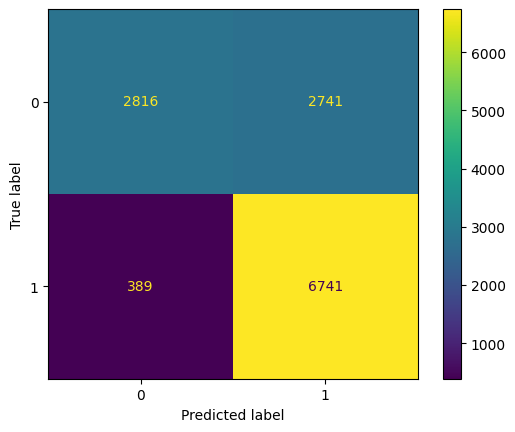

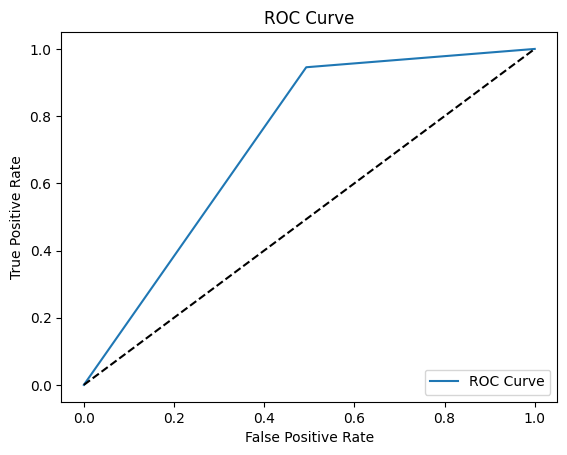

In [146]:
test_predictions = xgboost_model.predict_proba(X_test)

threshold = 0.5

y_pred = np.where(test_predictions[:,0]>threshold,0,1)

xgboostAccuracy = accuracy_score(y_true = y_test,
                                      y_pred = y_pred
                                      )

xgboostPrecision = precision_score(y_true = y_test,
                                        y_pred = y_pred
                                      )

xgboostRecall = recall_score(y_true = y_test,
                                  y_pred = y_pred
                                  )

xgboostRoc_auc_score = roc_auc_score(y_true = y_test,
                                          y_score = y_pred
                                  )
print("Test set metrics : \n")
print(f"Accuracy : {xgboostAccuracy}, Precision : {xgboostPrecision}, Recall : {xgboostRecall}, ROC AUC Score {xgboostRoc_auc_score}")

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_predictions)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Alternative : Using KFold cross validation

In [147]:
from sklearn.model_selection import StratifiedKFold, train_test_split

In [159]:
n_splits = 5
n_iterations = 10
threshold_range = np.linspace(0.25, 0.85, 11)


In [160]:
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

model_metrics = []

In [161]:
best_model = None
overall_best_f1 = -1

Model performance metrics:
Accuracy: 0.7613304957830851, Precision: 0.7239243982553444, Recall: 0.9353649203367425, ROC AUC: 0.7346581896475095, Optimal Threshold: 0.37, F1 Score: 0.8161728994657601
Accuracy: 0.7573894537715772, Precision: 0.714330429339037, Recall: 0.9526890697836221, ROC AUC: 0.7274580700249806, Optimal Threshold: 0.31, F1 Score: 0.8164689046568482
Accuracy: 0.758295893434224, Precision: 0.7160085994441823, Recall: 0.9501113275814083, ROC AUC: 0.728918597802702, Optimal Threshold: 0.31, F1 Score: 0.8166133421044762
Accuracy: 0.7642468668716008, Precision: 0.7274945770065075, Recall: 0.9334121903701642, ROC AUC: 0.7383385256522699, Optimal Threshold: 0.37, F1 Score: 0.8176886504937217
Accuracy: 0.7609758020020494, Precision: 0.7176316478910139, Recall: 0.9529640968549958, ROC AUC: 0.7315720320668362, Optimal Threshold: 0.31, F1 Score: 0.8187225393789042


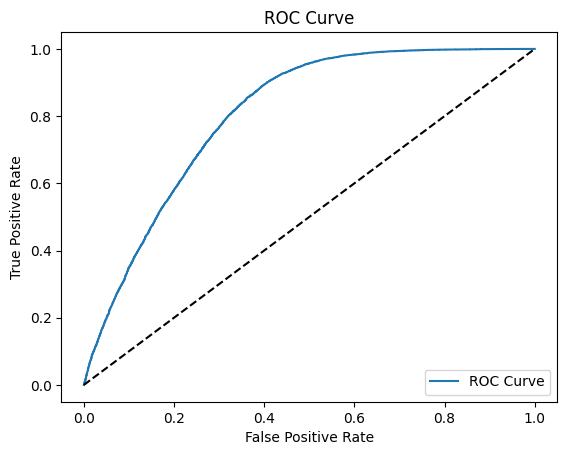

In [162]:
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    model = XGBClassifier(n_estimators=500, max_depth=7, subsample=0.7, grow_policy='depthwise',
                          learning_rate=0.2, min_child_weight=5, random_state=42)
    model.fit(X_train, y_train)

    test_predictions_proba = model.predict_proba(X_test)[:, 1]
    best_f1 = 0
    best_threshold = 0.5
    for threshold in threshold_range:
        y_pred = (test_predictions_proba > threshold).astype(int)
        f1 = f1_score(y_test, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    if best_f1 > overall_best_f1:
      overall_best_f1 = best_f1
      best_model = model

    y_pred = (test_predictions_proba > best_threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    model_metrics.append((accuracy, precision, recall, roc_auc, best_threshold, best_f1))


print("Model performance metrics:")
for metrics in model_metrics:
    print(f"Accuracy: {metrics[0]}, Precision: {metrics[1]}, Recall: {metrics[2]}, ROC AUC: {metrics[3]}, Optimal Threshold: {metrics[4]}, F1 Score: {metrics[5]}")

fpr, tpr, _ = roc_curve(y_test, test_predictions_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [165]:
overall_best_f1

0.8187225393789042

In [164]:
import joblib
if best_model is not None:
    joblib.dump(best_model, 'best_model.joblib')

CONCLUSIONS:

- overall, best model proved to be XGBoost
- only 2 features were removed; 'avg_open_overs','avg_open_sport'
- models were good at predicting campaign class
- no feature were scaled (even though scaling would have helped in logistic regression for instance) due to nature of XGBoost, where the data doesn't have to be scaled
- semi-supervied model training did show some progress, but the best model was obtained using stratified k fold sampling, after which the model achieved the highest F1 score, and that model is serialized. Moreover, in that code I added iterating over linear space of threshold, to check which threshold is the best to set for predicting classes, given the uncertainty of the data.
- final model logs : F1 Score 82%, Accuracy: 7/%, Precision: 72%, Recall: 95%